In [1]:
#select where to run this notebook---
binder_or_localpc=True #True: if you want to run the script using binder or in your local PC
google_colab=False #True: if you want to run the script in google colab

In [2]:
%%capture
#!pip freeze. #to list the packages installed in colab
#or install without checking above (!but do it just once)---
if google_colab:
    !pip install numpy
    !pip install matplotlib
    !pip install netcdf4
    !pip install xarray
    !pip install scipy
    !pip install tqdm

In [3]:
#open packages---
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import os

In [4]:
#modify the local path in case you run this script in your computer---
if binder_or_localpc:
    main_dir="../"
if google_colab:
    #google colab path:
    mount_point='/content/gdrive/' #dir name for a temporal mount point (just for running this script)
    gdrive_path="MyDrive/colab_repos/" #the path in "my Google Drive" where you have cloned the repo
    main_dir=mount_point+gdrive_path
    #mount:
    from google.colab import drive
    drive.mount(mount_point)

In [5]:
#don't modify below names---
#AGU number:
agu_number="num" #put here the agu manuscript number
#name of the repository:
if binder_or_localpc: 
    dir_repo_name=""
if google_colab:
    #name of directories from the cloned github repo:
    dir_repo_name="paper_Atmospherically_Driven_Seasonal_Interannual_LTTS_MultipleInlet/"
dir_data="data/"
dir_figures="figures/"
#name of file with data:
file_maps_clim_Tr_Te=f"maps_climatology_Tr_Te.nc"

In [6]:
#create dir figures if it does not exists---
if not os.path.exists(main_dir+dir_repo_name+dir_figures):
    os.makedirs(main_dir+dir_repo_name+dir_figures)

In [7]:
#general font size---
glob_font_size=12
params = {'legend.fontsize':glob_font_size,
          'axes.titlesize':glob_font_size,'axes.labelsize': glob_font_size, #size of titles, x-y labels 
          'xtick.labelsize':glob_font_size-1,'ytick.labelsize':glob_font_size-1, #size of xtick-labels, ytick-labels
          'xtick.major.size':2,'xtick.major.width':.8, #length and width of xticks marks
          'ytick.major.size':2,'ytick.major.width':.8} #length and width of yticks marks
mpl.rcParams.update(params)

In [8]:
#functions---
def create_cmap(numcolors=11,colors=['blue','white','red'],name='create_cmap'):
    """
    Create a custom diverging colormap
    Default is blue to white to red with 11 colors. Colors can be specified
    in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    """
    from matplotlib.colors import LinearSegmentedColormap
    cmap = LinearSegmentedColormap.from_list(N=numcolors,colors=colors,name=name)
    return cmap

In [9]:
#open data---
ds=xr.open_dataset(main_dir+dir_repo_name+dir_data+file_maps_clim_Tr_Te) 
ds

<xarray.Dataset>
Dimensions:    (yc: 115, xc: 286, yhc: 486, xhc: 820, np_dws: 1797, xy_dws: 2)
Coordinates:
    x          (yc, xc) float64 ...
    y          (yc, xc) float64 ...
    xh         (yhc, xhc) float64 ...
    yh         (yhc, xhc) float64 ...
Dimensions without coordinates: yc, xc, yhc, xhc, np_dws, xy_dws
Data variables:
    Tr_autwin  (yc, xc) float64 ...
    Tr_sprsum  (yc, xc) float64 ...
    Te_autwin  (yc, xc) float64 ...
    Te_sprsum  (yc, xc) float64 ...
    h          (yhc, xhc) float64 ...
    bdr_dws    (np_dws, xy_dws) float64 ...

In [10]:
#create ocean-land mask---
mask=ds.h.copy(); mask=xr.where(np.isfinite(mask),1,0) #mask ocean=1, land=0
#
#color map for land---
cmap_land=create_cmap(numcolors=2,colors=['w','w'])
cmap_land.set_bad(color='wheat')

### plot maps

/tmp/ipykernel_99136/2360685659.py:18: UserWarning: No contour levels were found within the data range.
  ax.contour(ds.xh,ds.yh,mask,levels=[1],linewidths=.5,colors='k')
/tmp/ipykernel_99136/2360685659.py:18: UserWarning: No contour levels were found within the data range.
  ax.contour(ds.xh,ds.yh,mask,levels=[1],linewidths=.5,colors='k')
/tmp/ipykernel_99136/2360685659.py:51: UserWarning: No contour levels were found within the data range.
  ax.contour(ds.xh,ds.yh,mask,levels=[1],linewidths=.5,colors='k')
/tmp/ipykernel_99136/2360685659.py:51: UserWarning: No contour levels were found within the data range.
  ax.contour(ds.xh,ds.yh,mask,levels=[1],linewidths=.5,colors='k')


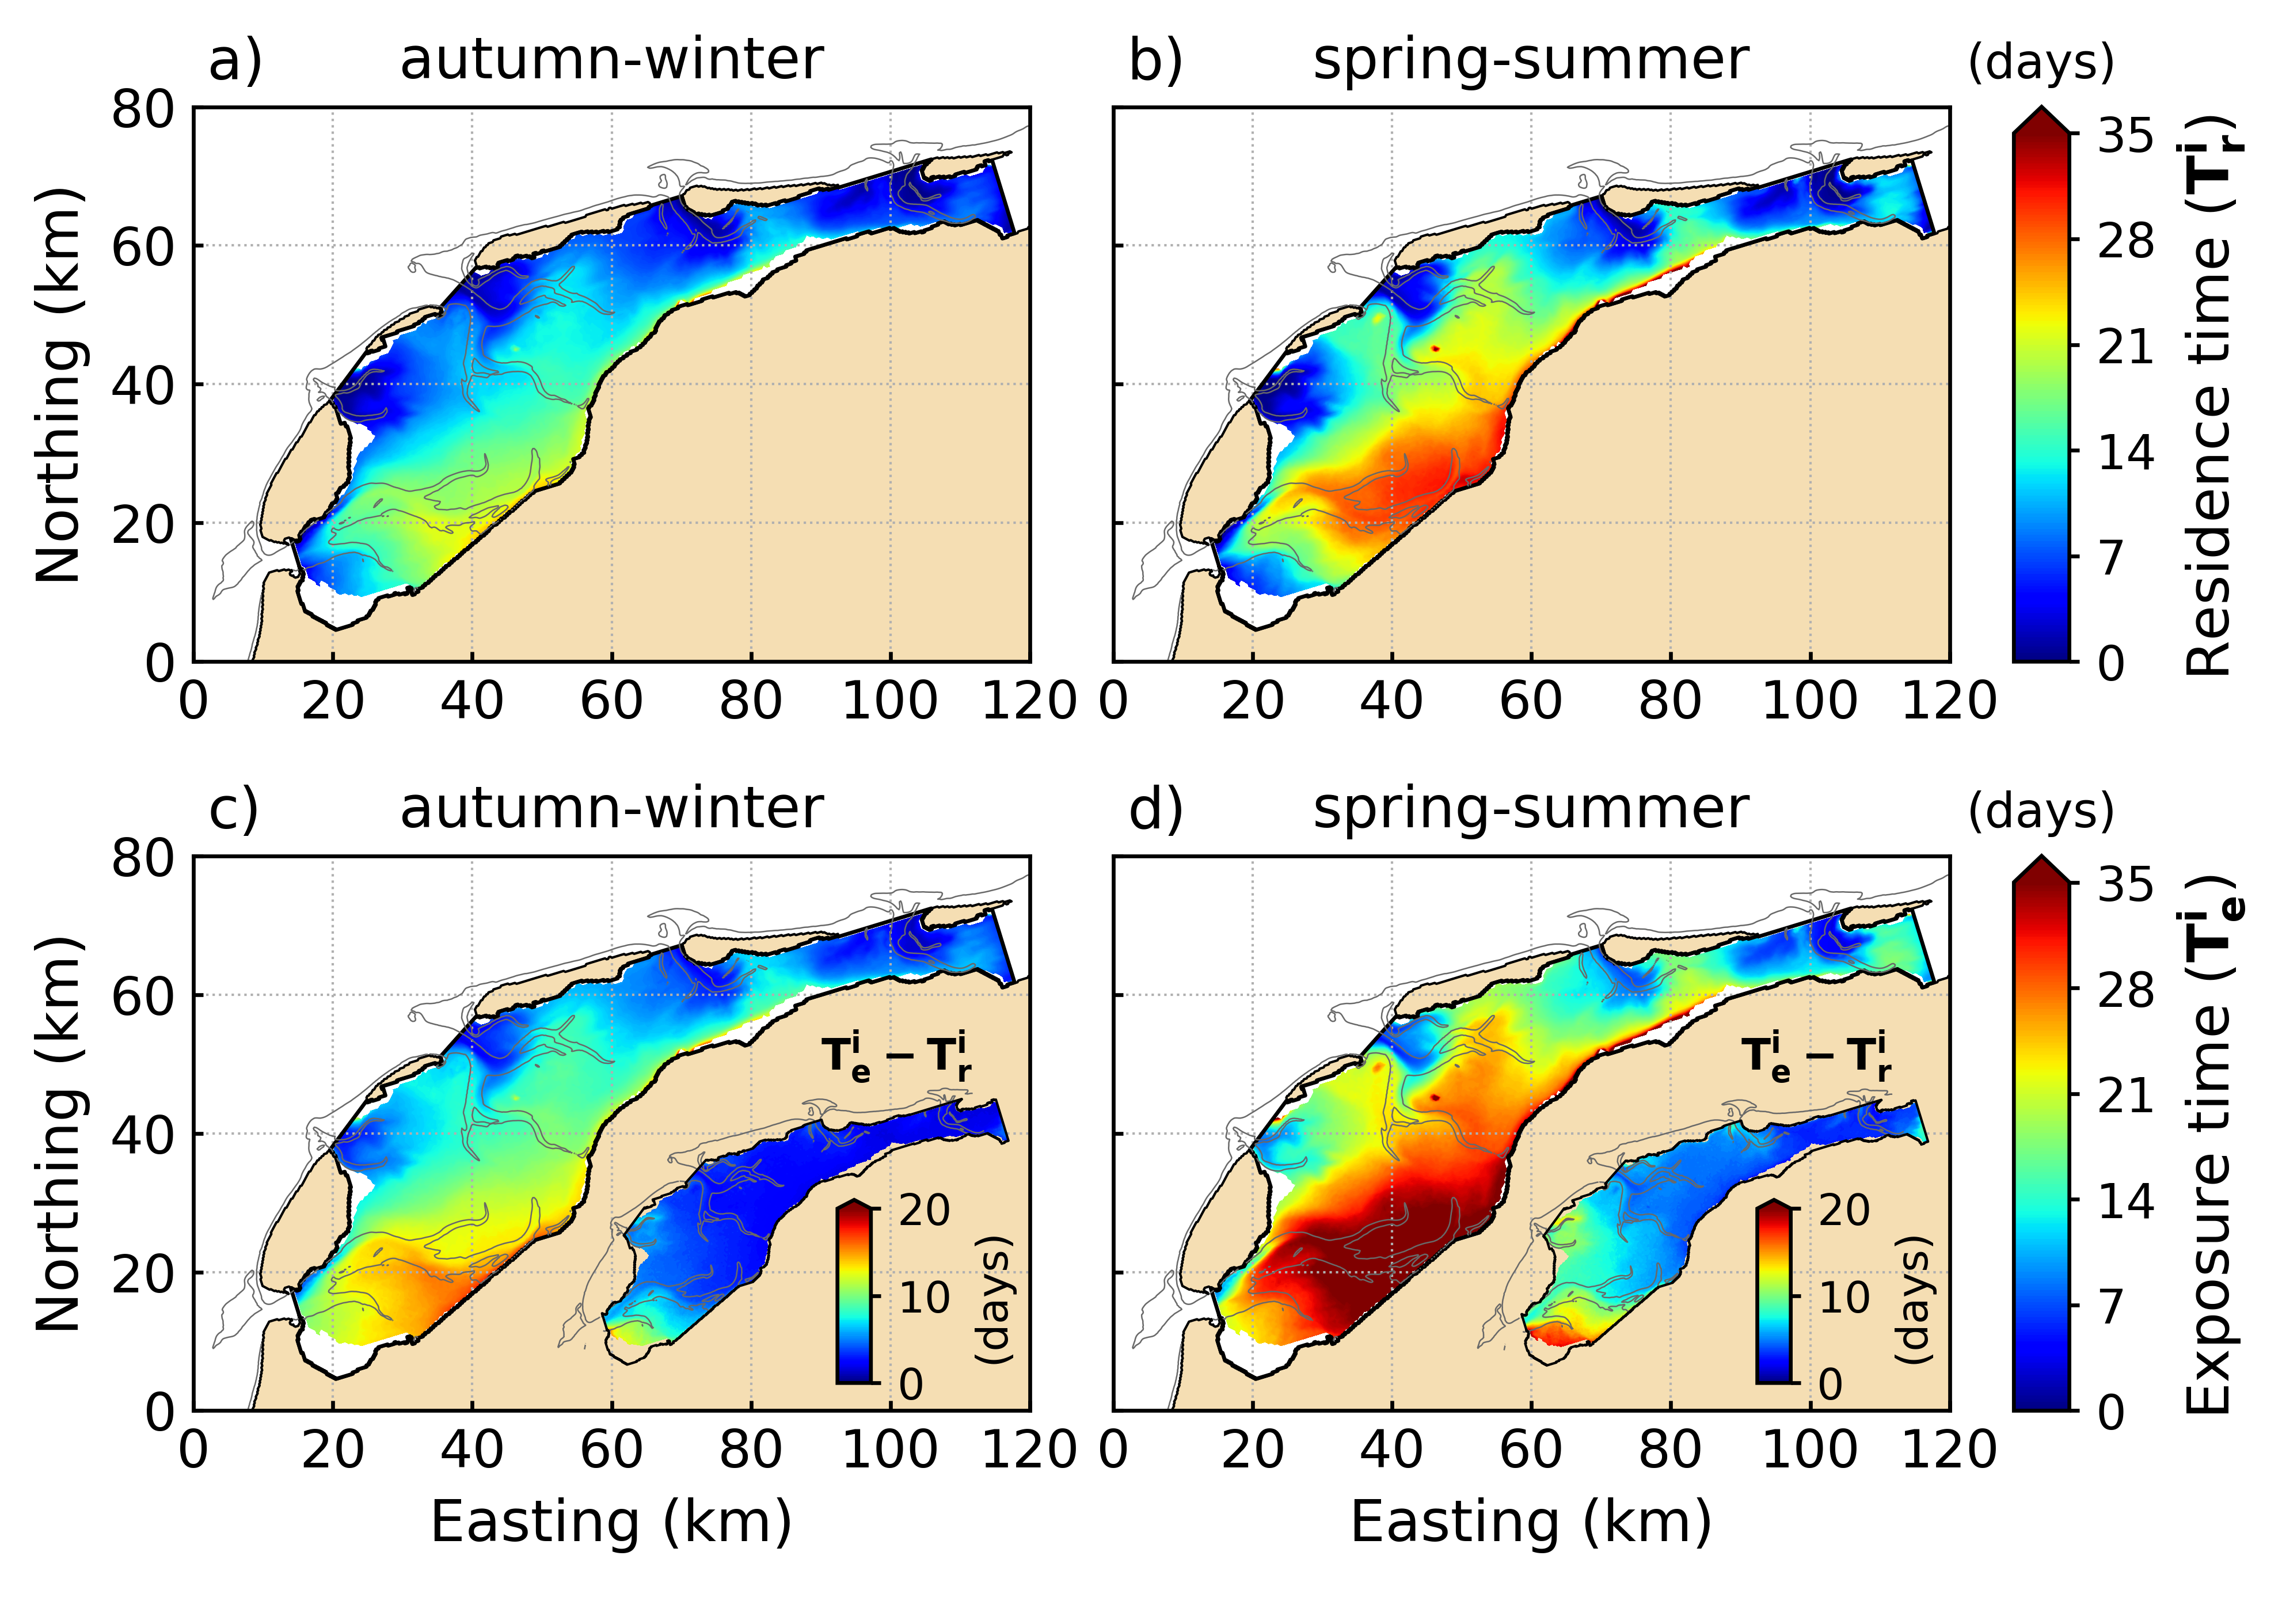

In [11]:
fig=plt.figure(figsize=(8,5),dpi=600) 
gs = fig.add_gridspec(nrows=2, ncols=2, hspace=.35, wspace=.1)                   

#plot Tr---
axs=[]
for i in range(2):
    if i==0:
        val=ds.Tr_autwin; title="autumn-winter"; lab="a)"
    else:
        val=ds.Tr_sprsum; title="spring-summer"; lab="b)"
    gss=gs[0,i]
    ax = fig.add_subplot(gss)
    ax.pcolormesh(ds.xh,ds.yh,ds.h,vmin=-2,vmax=32,cmap=cmap_land,shading='auto',rasterized=True)
    #ax.contour(ds.x,ds.y,val,levels=np.arange(0,30.2,.2),cmap="jet",linewidths=.1) #fix problems of white lines when saving a contourf plot in pdf format (seems to work well for Jupyter-lab and Colab but could lead to errors with NaN data)
    cs=ax.contourf(ds.x,ds.y,val,levels=np.arange(0,35.2,.2),cmap="jet",extend='max')
    for c in cs.collections: c.set_rasterized(True) #fix problems of white lines for pdf format (seems to work well only for Jupyter-lab)
    #for c in cs.collections: c.set_edgecolor("face") #fix problems of white lines for pdf format (seems to have problems with NaN data)
    ax.contour(ds.xh,ds.yh,mask,levels=[1],linewidths=.5,colors='k')
    ax.plot(ds.bdr_dws[:,0],ds.bdr_dws[:,1],ls='-',color='k',lw=.8,markersize=0)
    ax.contour(ds.xh,ds.yh,ds.h,levels=[5],linewidths=.3,colors='dimgrey')
    ax.grid(linewidth=0.5,ls=':')
    yticks=np.arange(540,640,20); ax.set_yticks(yticks);ax.set_yticklabels(yticks-540);
    xticks=np.arange(100,240,20); ax.set_xticks(xticks);ax.set_xticklabels(xticks-100);
    ax.axis('equal'); ax.axis([xticks[0],xticks[-1],yticks[0],yticks[-1]]);
    ax.tick_params(direction="in")
    ax.set_title(f"{title}")
    ax.text(102,540+84,lab,fontsize=glob_font_size)
    #ax.set_xlabel('Easting (km)')
    if i==0: ax.set_ylabel('Northing (km)');
    axs+=[ax]
    if i==1:
        ax.set_yticklabels("")
        #colorbar
        cbar=fig.colorbar(cs,ax=axs,ticks=np.arange(0,36,7),aspect=10,pad=0.03);
        cbar.set_label(label=r"Residence time ($\bf{T_r^i}$)",rotation=90)
        cbar.ax.set_title("(days)",fontsize=glob_font_size-2,y=1.05)
        cbar.ax.tick_params(labelsize=glob_font_size-2)
#
#Te---                  
axs=[]
for i in range(2):
    if i==0:
        val=ds.Te_autwin; diff=ds.Te_autwin-ds.Tr_autwin; title="autumn-winter"; lab="c)"
    else:
        val=ds.Te_sprsum; diff=ds.Te_sprsum-ds.Tr_sprsum;title="spring-summer"; lab="d)"
    gss=gs[1,i]
    ax = fig.add_subplot(gss)
    ax.pcolormesh(ds.xh,ds.yh,ds.h,vmin=-2,vmax=32,cmap=cmap_land,shading='auto',rasterized=True)
    cs=ax.contourf(ds.x,ds.y,val,levels=np.arange(0,35.2,.2),cmap="jet",extend='max') 
    for c in cs.collections: c.set_rasterized(True) #fix problems of white lines for pdf format (seems to work well only for Jupyter-lab)
    ax.contour(ds.xh,ds.yh,mask,levels=[1],linewidths=.5,colors='k')
    ax.plot(ds.bdr_dws[:,0],ds.bdr_dws[:,1],ls='-',color='k',lw=.8,markersize=0)
    ax.contour(ds.xh,ds.yh,ds.h,levels=[5],linewidths=.3,colors='dimgrey')
    ax.grid(linewidth=0.5,ls=':')
    yticks=np.arange(540,640,20); ax.set_yticks(yticks);ax.set_yticklabels(yticks-540)
    xticks=np.arange(100,240,20); ax.set_xticks(xticks);ax.set_xticklabels(xticks-100)
    ax.axis('equal'); ax.axis([xticks[0],xticks[-1],yticks[0],yticks[-1]]);
    ax.tick_params(direction="in")
    ax.set_title(f"{title}")
    ax.text(102,540+84,lab,fontsize=glob_font_size)
    ax.set_xlabel('Easting (km)')
    if i==0: ax.set_ylabel('Northing (km)');
    axs+=[ax]
    if i==1: 
        ax.set_yticklabels("")
        #colorbar for Te
        cbar=fig.colorbar(cs,ax=axs,ticks=np.arange(0,36,7),aspect=10,pad=0.03);
        cbar.set_label(label=r"Exposure time ($\bf{T_e^i}$)",rotation=90)
        cbar.ax.set_title("(days)",fontsize=glob_font_size-2,y=1.05)
        cbar.ax.tick_params(labelsize=glob_font_size-2)
    #
    #plot Te-Tr:
    if i==0:
        iax=fig.add_axes([.253,0.022,.17,.42])
    else:
        iax=fig.add_axes([.5858,0.0215,.17,.42])
    iax.contour(ds.x,ds.y,diff,levels=np.arange(0,20.2,.2),cmap="jet",linewidths=0) #fix problems of white lines when saving a contourf plot in pdf format 
    ics=iax.contourf(ds.x,ds.y,diff,levels=np.arange(0,20.2,.2),cmap="jet",extend='max')
    #for c in ics.collections: c.set_rasterized(True) #fix problems of white lines when saving a contourf plot in pdf format (seems to not work when testing in Colab)
    iax.contour(ds.xh[200:,:-100],ds.yh[200:,:-100],ds.h[200:,:-100],levels=[5],linewidths=.3,colors='dimgrey') 
    iax.plot(ds.bdr_dws[:,0],ds.bdr_dws[:,1],ls='-',color='k',lw=.5,markersize=0)
    yticks=np.arange(540,640,20); iax.set_yticks(yticks);iax.set_yticklabels([]);
    xticks=np.arange(100,240,20); iax.set_xticks(xticks);iax.set_xticklabels([]);
    iax.axis('equal'); iax.axis([xticks[0],xticks[-1],yticks[0],yticks[-1]]);
    iax.axis('off')
    #colorbar for Te-Tr
    icax=ax.inset_axes([0.77, 0.05, 0.04, 0.33])#scale 0-1
    cbar=fig.colorbar(ics,cax=icax,ticks=np.arange(0,21,10),aspect=10,pad=0.03);
    ax.text(190,589,r"$\bf{T_e^i - T_r^i}$",fontsize=glob_font_size-3) 
    cbar.set_label(label="(days)",rotation=90,fontsize=glob_font_size-3)
    cbar.ax.tick_params(labelsize=glob_font_size-3)
    #
fig_name='f02'
fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.jpg',bbox_inches='tight',pad_inches=0.1,dpi=600)
#fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.pdf',bbox_inches='tight',pad_inches=0.1,dpi=600)